In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.6.0


In [2]:
train = pd.read_csv("train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [5]:
train.shape

(42000, 785)

In [6]:
print("Q: Are there any missing values in training data?", "\n" +
      "A: {}".format(train.isna().values.any()))

Q: Are there any missing values in training data? 
A: False


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
# Extract features
features = train.drop('label', axis=1)

# Extract label
label = train['label']

In [9]:
# Train images
features = np.array(features)

In [10]:
features.shape

(42000, 784)

In [11]:
features_reshaped = features.reshape(42000, 28, 28)  # it 28, 28  because 28 X 28 = 784!

In [12]:
# Test images
test = np.array(test)
test.shape

(28000, 784)

In [13]:
print('Training Dataset Shape: {}'.format(features_reshaped.shape))
print()
print('Testing Dataset Shape: {}'.format(test.shape))         # We will hold on the test dataset for now ...

Training Dataset Shape: (42000, 28, 28)

Testing Dataset Shape: (28000, 784)


In [14]:
np.min(features_reshaped)

0

In [15]:
np.max(features_reshaped)

255

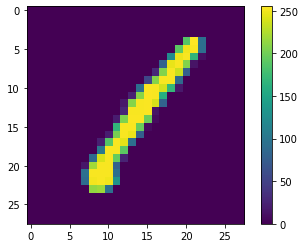

In [16]:
plt.figure()
plt.imshow(features_reshaped[0])
plt.colorbar()
plt.show()

In [17]:
features_norm = features_reshaped / 255.0        # Scaled from [0 to 1]

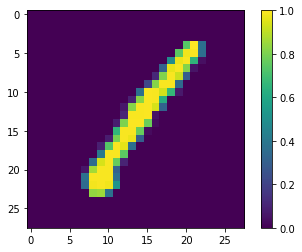

In [18]:
plt.figure()
plt.imshow(features_norm[0])
plt.colorbar()
plt.show()

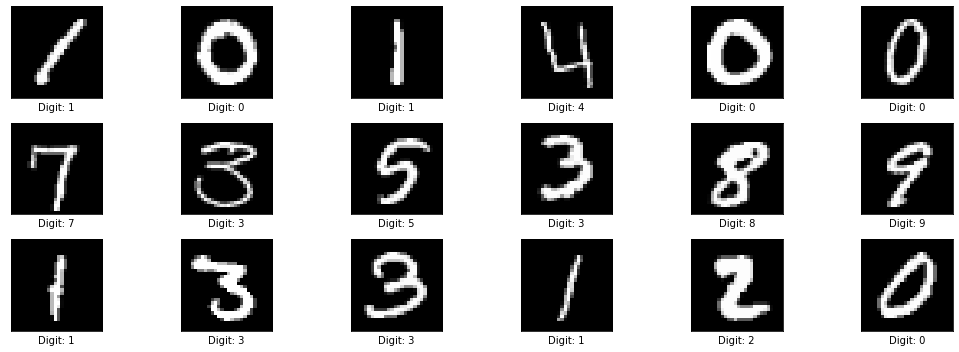

In [19]:
fig = plt.figure(figsize=(16,5))

for images in range(18):
    fig.add_subplot(3, 6, images+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(features_norm[images], cmap="gray")
    plt.xlabel('Digit: ' + str(label[images]))
    plt.tight_layout() # to see clear graph
plt.show();

In [20]:
features_norm.shape

(42000, 28, 28)

In [21]:
X = features_norm
y = label

In [22]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((33600, 28, 28), (8400, 28, 28), (33600,), (8400,))

In [23]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum 
test_norm = test / 255.0
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28,1)

In [24]:
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation="relu"),  
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")   # for multiclass classification,  #10 is the number of classes
])



#2 Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

################################### excuse me please ###################################
# Load the TensorBoard notebook extension
import  datetime
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
########################################################################################

# 3. Fit the model
history_data = model.fit(X_train, y_train, batch_size=50, epochs=30, callbacks=[tensorboard_callback])

Epoch 1/30


C:\Users\Maxie\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


672/672 [==============================] - 10s 13ms/step - loss: 0.3034 - accuracy: 0.9128
Epoch 2/30
672/672 [==============================] - 8s 12ms/step - loss: 0.1689 - accuracy: 0.9527
Epoch 3/30
672/672 [==============================] - 8s 12ms/step - loss: 0.1418 - accuracy: 0.9608
Epoch 4/30
672/672 [==============================] - 8s 12ms/step - loss: 0.1224 - accuracy: 0.9664
Epoch 5/30
672/672 [==============================] - 8s 12ms/step - loss: 0.1122 - accuracy: 0.9690
Epoch 6/30
672/672 [==============================] - 8s 12ms/step - loss: 0.1150 - accuracy: 0.9697
Epoch 7/30
672/672 [==============================] - 8s 12ms/step - loss: 0.0987 - accuracy: 0.9729
Epoch 8/30
672/672 [==============================] - 8s 12ms/step - loss: 0.1009 - accuracy: 0.9737
Epoch 9/30
672/672 [==============================] - 8s 12ms/step - loss: 0.0912 - accuracy: 0.9767
Epoch 10/30
672/672 [==============================] - ETA: 0s - loss: 0.0789 - accuracy: 0.98 - 8s 1

In [25]:
model.evaluate(X_valid, y_valid)

263/263 [==============================] - 2s 6ms/step - loss: 0.3223 - accuracy: 0.9660


[0.3222794532775879, 0.9659523963928223]

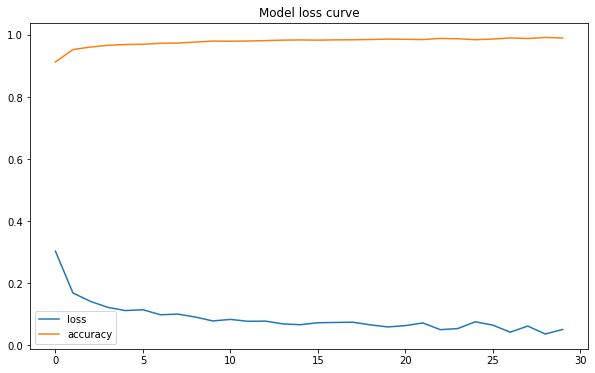

In [26]:
# Plot the loss curves
#plt.figure(figsize=(12, 6))
pd.DataFrame(history_data.history).plot(figsize=(10, 6))
plt.title("Model loss curve")
plt.show()

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


**For deep dive analysis, we turn to `Tensorboard!`**

In [28]:
################### excuse me please ####################
%tensorboard --logdir logs/fit
#########################################################

In [29]:
y_prob = model.predict(X_valid)
y_prob[:3]

array([[6.4507132e-12, 4.0918018e-22, 5.2884539e-14, 9.8311154e-16,
        9.6773006e-15, 1.8358475e-14, 1.0323594e-19, 6.7737297e-22,
        1.0000000e+00, 2.7019551e-13],
       [0.0000000e+00, 1.0000000e+00, 5.7767110e-36, 0.0000000e+00,
        4.8019769e-36, 0.0000000e+00, 7.7320950e-37, 6.9362622e-24,
        3.4327975e-30, 0.0000000e+00],
       [3.5057399e-16, 4.7338089e-10, 5.7433669e-25, 3.8129590e-15,
        1.6040700e-14, 1.9345014e-14, 0.0000000e+00, 1.8869058e-13,
        7.2251818e-17, 1.0000000e+00]], dtype=float32)

In [30]:
# Convert all of the prediction probabilities into integers
y_preds = y_prob.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_valid, y_pred=y_preds)
cm

array([[797,   0,   1,   0,   0,   1,   4,   3,   8,   2],
       [  0, 898,   1,   1,   0,   1,   0,   0,   8,   0],
       [  3,   5, 810,   3,   5,   0,   0,   7,  12,   1],
       [  0,   0,   5, 898,   0,   6,   2,   5,  17,   4],
       [  2,   1,   0,   0, 788,   1,   3,   5,   7,  32],
       [  0,   0,   1,   8,   0, 663,   7,   2,  18,   3],
       [  8,   1,   1,   0,   1,   4, 762,   0,   8,   0],
       [  0,   0,   3,   2,   2,   1,   0, 875,   2,   8],
       [  1,   4,   1,   4,   4,   6,   1,   0, 804,  10],
       [  2,   1,   0,   3,   0,   2,   0,   6,   5, 819]], dtype=int64)

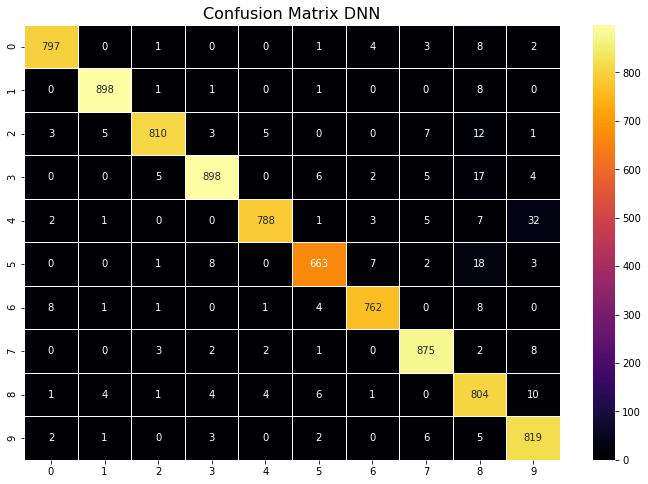

In [32]:
plt.figure(figsize=(12,8))
plt.title('Confusion Matrix DNN', size = 16)
sns.heatmap(cm, annot = True, cmap = 'inferno', fmt='.4g', linewidths=1.0, linecolor='white');

* We could see that label 0 has able to make 795 successful predictions for digit 0, whiles its wrongly prediction digit 4, digit 6 as label 0 once

* Label 1 was successfully predicted 899 times, whereas digit 2 was wrongly predicted as 1 three times, digit 3, 4, 5, 6 one time, digit 7 was predicted as label 1 three times and digit 8 wrongly predicted as label 1 five times and so on...

# `Prediction in Testing phase`

In [33]:
# test already normalized above
# Now is the time to reshape it...
test = test.reshape(test.shape[0], 28, 28,1)

In [34]:
final = model.predict(test)

In [35]:
final_pred = final.argmax(axis=1)
final_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [36]:
final_pred.shape

(28000,)

# checking accuracy of final result

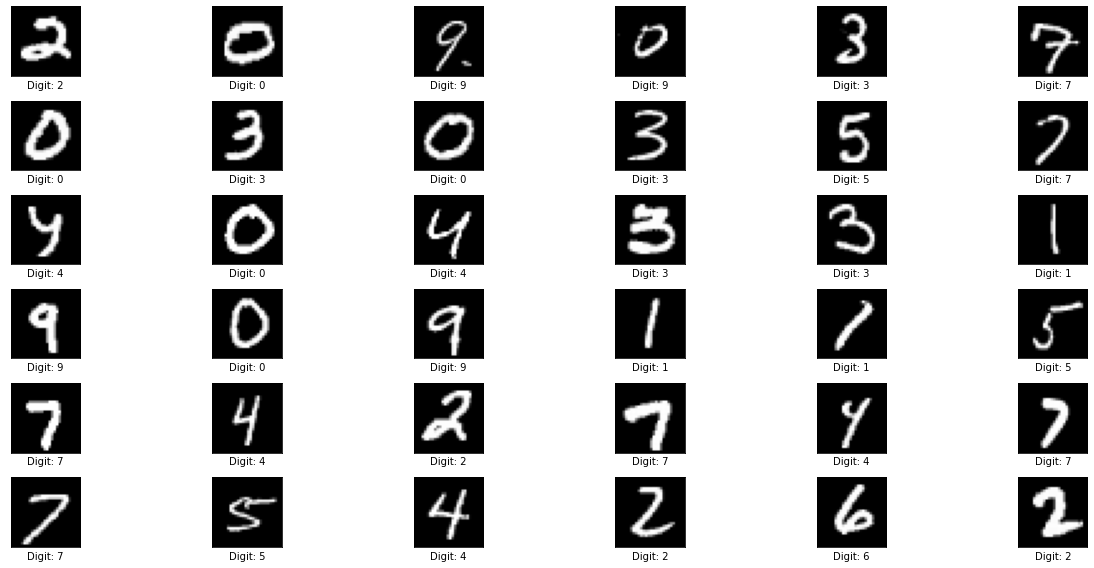

In [37]:
fig = plt.figure(figsize=(20,8))

for images in range(36):
    fig.add_subplot(6, 6, images+1)
    plt.xticks([])
    plt.yticks([]) 
    plt.imshow(test[images], cmap="gray")            # data is on our unseen test dataset
    plt.xlabel('Digit: ' + str(final_pred[images]))  # tag along with our final prediction to see how well it got it right.
    plt.tight_layout() # to see clear graph
plt.show();

In [38]:
# Creating Submission File

submissions = pd.read_csv("sample_submission.csv")
submissions['Label'] = final_pred
submissions.to_csv('submission.csv', index = False)